In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense 

In [2]:
df=pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
x=df.drop("TEY",axis=1)
y=df.TEY

In [5]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [6]:
y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

In [7]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [8]:
x_scaled

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=7)

In [10]:
x_scaled.shape

(15039, 10)

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [12]:
model.compile(loss="mean_squared_error",optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [13]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=50)

Epoch 1/50
301/301 [==============================] - 1s 3ms/step - loss: 5625.8032 - mae: 56.9819 - val_loss: 339.8193 - val_mae: 14.4372
Epoch 2/50
301/301 [==============================] - 1s 2ms/step - loss: 226.8334 - mae: 11.4436 - val_loss: 150.2120 - val_mae: 9.1217
Epoch 3/50
301/301 [==============================] - 1s 2ms/step - loss: 119.1121 - mae: 7.8190 - val_loss: 89.0605 - val_mae: 6.6729
Epoch 4/50
301/301 [==============================] - 1s 2ms/step - loss: 75.9883 - mae: 6.0334 - val_loss: 57.9547 - val_mae: 5.2146
Epoch 5/50
301/301 [==============================] - 1s 2ms/step - loss: 50.1926 - mae: 4.7261 - val_loss: 37.9800 - val_mae: 4.1265
Epoch 6/50
301/301 [==============================] - 1s 2ms/step - loss: 32.5597 - mae: 3.7492 - val_loss: 24.7951 - val_mae: 3.2421
Epoch 7/50
301/301 [==============================] - 1s 2ms/step - loss: 20.9325 - mae: 2.9417 - val_loss: 15.2092 - val_mae: 2.5225
Epoch 8/50
301/301 [==============================] -

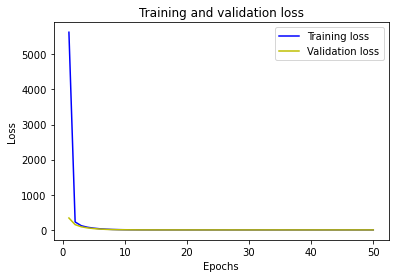

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

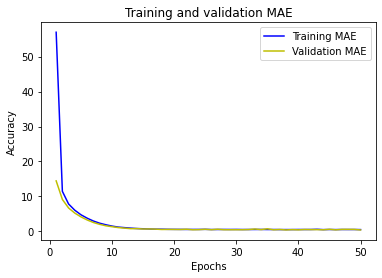

In [20]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'b', label='Training MAE')
plt.plot(epochs, val_acc, 'y', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
#Predict on test data
predictions = model.predict(x_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[160.197  ]
 [154.76675]
 [152.19019]
 [132.70192]
 [105.00695]]
Real values are:  7118     160.05
2711     156.00
2018     153.15
2091     132.54
11369    105.31
Name: TEY, dtype: float64
